In [1]:
! pip install keras-tuner

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score,recall_score,fbeta_score
from imblearn.combine import SMOTETomek


import tensorflow as tf
import keras
from keras import layers, Sequential
from keras.callbacks import EarlyStopping
import keras_tuner
from keras_tuner.tuners import RandomSearch

In [4]:
data = pd.read_csv(r'/content/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data['id'].nunique()

5110

In [8]:
ohe = OneHotEncoder(sparse_output=False)

In [9]:
gender = ohe.fit_transform(data[['gender']])
gender = pd.Series(gender.argmax(axis=1))
data['gender'] = gender
gender.unique()

array([1, 0, 2])

In [10]:
ever_married = ohe.fit_transform(data[['ever_married']])
ever_married = pd.Series(ever_married.argmax(axis=1))
data['ever_married'] = ever_married
ever_married.unique()

array([1, 0])

In [11]:
work_type =ohe.fit_transform(data[['work_type']])
work_type = pd.Series(work_type.argmax(axis=1))
data['work_type'] = work_type
work_type.unique()

array([2, 3, 0, 4, 1])

In [12]:
Residence_type =ohe.fit_transform(data[['Residence_type']])
Residence_type = pd.Series(Residence_type.argmax(axis=1))
data['Residence_type'] = Residence_type
Residence_type.unique()

array([1, 0])

In [13]:
smoking_status =ohe.fit_transform(data[['smoking_status']])
smoking_status = pd.Series(smoking_status.argmax(axis=1))
data['smoking_status'] = smoking_status
smoking_status.unique()

array([1, 2, 3, 0])

In [14]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [15]:
data.dropna(inplace=True)

In [16]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
data.drop(data[['id']],inplace=True,axis=1)

In [18]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [19]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [20]:
x = data.iloc[: , :-1]
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [21]:
y = data[['stroke']]
y

,stroke
0,1
2,1
3,1
4,1
5,1
...,...
5104,0
5106,0
5107,0
5108,0


In [22]:
st =SMOTETomek(random_state=42)

In [23]:
x,y = st.fit_resample(x,y)

In [24]:
y.value_counts()

stroke
0         4652
1         4652
Name: count, dtype: int64

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [26]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=.2,random_state=42)

In [27]:
x_train.count()

gender               5954
age                  5954
hypertension         5954
heart_disease        5954
ever_married         5954
work_type            5954
Residence_type       5954
avg_glucose_level    5954
bmi                  5954
smoking_status       5954
dtype: int64

In [28]:
x_val.count()

gender               1489
age                  1489
hypertension         1489
heart_disease        1489
ever_married         1489
work_type            1489
Residence_type       1489
avg_glucose_level    1489
bmi                  1489
smoking_status       1489
dtype: int64

In [29]:
y_train.count()

stroke    5954
dtype: int64

In [30]:
y_val.count()

stroke    1489
dtype: int64

In [31]:
#x_train = x_train.values
#x_test = x_test.values
#y_train = y_train.values
#y_test = y_test.values
#x_val = x_val.values
#y_val = y_val.values

In [32]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation=hp.Choice('activation_1',['relu','tanh','sigmoid']),
    ))
    dropout_rate_1 = hp.Float('dropout_1',min_value=.1,max_value=.9,step=.1)
    model.add(layers.Dropout(dropout_rate_1))

    model.add(layers.Dense(
        units=hp.Int('units_2',min_value=32,max_value=512,step=32),
        activation=hp.Choice('activation_2',['relu','tanh','sigmoid']),
    ))

    dropout_rate_2 = hp.Float('dropout_2',min_value=.1,max_value=.9,step=.1)
    model.add(layers.Dropout(dropout_rate_2))

    model.add(layers.Dense(1,activation='sigmoid'))

    learning_rate=hp.Float('lr', min_value=1e-4, max_value=1e-2)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    return model

In [33]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my',
    project_name='ann_tuner'
)

In [34]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_val,y_val))

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.7978509068489075

Best val_accuracy So Far: 0.8146407008171082
Total elapsed time: 00h 01m 42s


In [35]:
best_param=tuner.get_best_hyperparameters(num_trials=1)[0]
best_param.values

{'units_1': 320,
 'activation_1': 'tanh',
 'dropout_1': 0.30000000000000004,
 'units_2': 480,
 'activation_2': 'relu',
 'dropout_2': 0.30000000000000004,
 'lr': 0.005029610844297814}

In [36]:
model = keras.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape = (10,) ))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [39]:
model.compile(optimizer = 'adam',loss= 'BinaryCrossentropy' ,metrics=['Accuracy'])

In [40]:
hist = model.fit(x_train,y_train,batch_size=32,epochs=180,validation_data=(x_val,y_val))

Epoch 1/180
187/187 [==============================] - 2s 4ms/step - loss: 1.3372 - Accuracy: 0.6930 - val_loss: 0.4765 - val_Accuracy: 0.7555
Epoch 2/180
187/187 [==============================] - 1s 3ms/step - loss: 0.4967 - Accuracy: 0.7566 - val_loss: 0.4737 - val_Accuracy: 0.7482
Epoch 3/180
187/187 [==============================] - 1s 3ms/step - loss: 0.4586 - Accuracy: 0.7822 - val_loss: 0.4159 - val_Accuracy: 0.8093
Epoch 4/180
187/187 [==============================] - 1s 3ms/step - loss: 0.4438 - Accuracy: 0.7909 - val_loss: 0.4586 - val_Accuracy: 0.7811
Epoch 5/180
187/187 [==============================] - 0s 3ms/step - loss: 0.4310 - Accuracy: 0.7971 - val_loss: 0.4006 - val_Accuracy: 0.8227
Epoch 6/180
187/187 [==============================] - 1s 3ms/step - loss: 0.4288 - Accuracy: 0.8021 - val_loss: 0.4612 - val_Accuracy: 0.7629
Epoch 7/180
187/187 [==============================] - 0s 3ms/step - loss: 0.4370 - Accuracy: 0.7934 - val_loss: 0.3904 - val_Accuracy: 0.8294

In [41]:
hist.history

{'loss': [1.3371822834014893,
  0.4966505467891693,
  0.45862916111946106,
  0.4438464343547821,
  0.43097954988479614,
  0.428753137588501,
  0.43699488043785095,
  0.4122300148010254,
  0.41824662685394287,
  0.4175899922847748,
  0.4121056795120239,
  0.4283147156238556,
  0.400189608335495,
  0.4032568037509918,
  0.4007399380207062,
  0.3942561149597168,
  0.3895624577999115,
  0.3900873064994812,
  0.3902984857559204,
  0.3860129415988922,
  0.3916506767272949,
  0.40204334259033203,
  0.3916096091270447,
  0.38608986139297485,
  0.3947601020336151,
  0.3898422122001648,
  0.3816472887992859,
  0.37387606501579285,
  0.38194891810417175,
  0.380583256483078,
  0.3743993937969208,
  0.38283079862594604,
  0.3883441686630249,
  0.3786933124065399,
  0.3712063431739807,
  0.38570457696914673,
  0.3740670680999756,
  0.3692932426929474,
  0.3628183603286743,
  0.3595019578933716,
  0.36561116576194763,
  0.370430052280426,
  0.3737695515155792,
  0.3687438666820526,
  0.3639624118804

In [42]:
model.evaluate(x_test,y_test)

59/59 [==============================] - 0s 2ms/step - loss: 0.3446 - Accuracy: 0.8576


[0.34460800886154175, 0.8576034307479858]

In [43]:
avg_accuracy = sum(hist.history['Accuracy']) / len(hist.history['Accuracy'])
val_avg_ac = sum(hist.history['val_Accuracy'])/float(len(hist.history['val_Accuracy']))

In [44]:
print(avg_accuracy)
val_avg_ac

0.8541624671883054


0.842560256520907

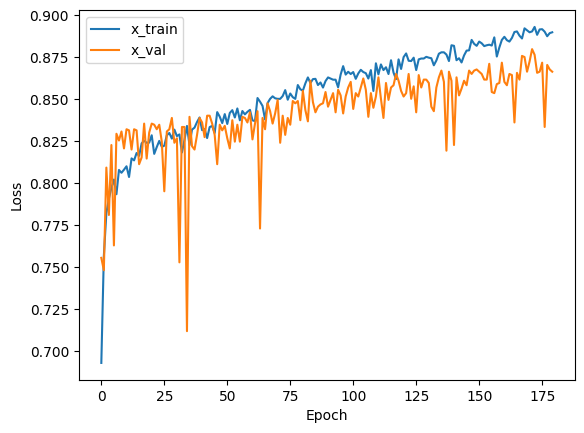

In [45]:
plt.plot(hist.history['Accuracy'],label = 'x_train')
plt.plot(hist.history['val_Accuracy'],label = 'x_val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
y_pred = model.predict(x_test)
y_pred.shape

59/59 [==============================] - 0s 2ms/step


(1861, 1)

In [47]:
y_pr = []
for a in y_pred:
  if a > 0.5:
    y_pr.append(1)
  else:
    y_pr.append(0)

In [48]:
y_pr[:13]

[1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]

In [49]:
np.where(np.atleast_1d(y_pr) == 1)

(array([   0,    1,    3,    4,    5,   10,   12,   14,   16,   17,   20,
          21,   25,   27,   30,   33,   38,   39,   41,   42,   44,   45,
          48,   49,   52,   55,   56,   58,   60,   65,   66,   67,   74,
          75,   77,   81,   82,   83,   86,   87,   90,   93,   98,   99,
         101,  102,  103,  104,  107,  108,  110,  112,  114,  115,  116,
         117,  119,  120,  121,  125,  127,  130,  133,  134,  136,  137,
         138,  140,  142,  144,  145,  146,  147,  148,  149,  152,  153,
         156,  157,  159,  160,  162,  163,  167,  168,  169,  170,  171,
         173,  175,  176,  179,  180,  181,  182,  183,  186,  187,  188,
         190,  192,  202,  205,  206,  207,  210,  212,  215,  216,  218,
         219,  220,  221,  222,  224,  228,  231,  232,  233,  234,  235,
         236,  237,  238,  240,  243,  244,  245,  249,  251,  252,  253,
         254,  256,  258,  260,  261,  263,  264,  265,  266,  270,  271,
         272,  274,  275,  276,  280, 

In [50]:
y_test

,stroke
6176,1
7087,1
3055,0
9081,1
592,0
...,...
274,0
1345,0
7048,1
4028,0


In [51]:
classification_report(y_test, y_pr)

'              precision    recall  f1-score   support\n\n           0       0.86      0.85      0.85       922\n           1       0.85      0.87      0.86       939\n\n    accuracy                           0.86      1861\n   macro avg       0.86      0.86      0.86      1861\nweighted avg       0.86      0.86      0.86      1861\n'

In [52]:
precision_score(y_test,y_pr)

0.852510460251046

In [53]:
recall_score(y_test,y_pr)

0.8679446219382322

In [54]:
fbeta_score(y_test,y_pr,beta=1)

0.8601583113456465